Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age: clints age at time of call.
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur",
   "student", "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None



1) Here we will first import the data but before importing the excel file we need to check whether it is in proper format or not.
as it was in text format we made it in proper form using execl (data<-text to col)

2) Here the target variable(y) is that whether the client has subscribed a term deposit or not Binomial ("yes" or "no") It means that the target variable has binary response (yes=1,no=0).( Target variable is of binary class)
 
 The term deposit is a fixed term investmentt that includes the deposite of money in an account in financial institute


In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_curve, auc
data=pd.read_csv('bank-full.csv')


In [2]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
  ###  there are 10 object data types in the columns , 
   
print(data.shape)
print(list(data.columns))


(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [5]:
 ## execpt y all the other are input variables.
    ###  we will see the object data types nature
    # so that we can finalize the input variable
for i in data.columns:
    if data[i].dtypes=='object':
        print(data[i].unique())
        print(data[i].value_counts(),'is count of object data type.',i)
        print("_____________")


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64 is count of object data type. job
_____________
['married' 'single' 'divorced']
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64 is count of object data type. marital
_____________
['tertiary' 'secondary' 'unknown' 'primary']
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64 is count of object data type. education
_____________
['no' 'yes']
default
no     44396
yes      815
Name: count, dtype: int64 is count of object data type. default
_____________


<Axes: xlabel='y', ylabel='count'>

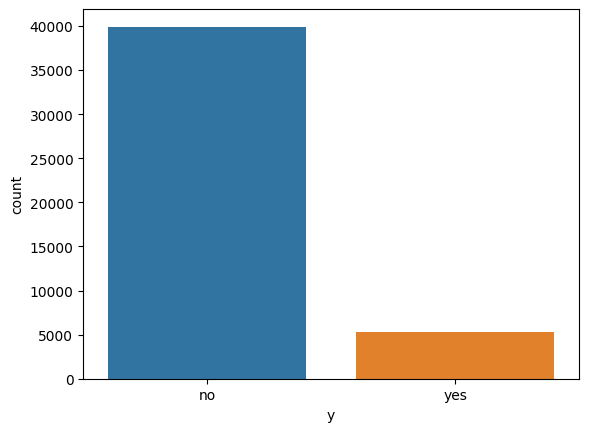

In [6]:
# to check that whether the response data is balanced or not.
sns.countplot(x='y',data=data)
       

In [7]:
# percentage of subscription is:
print('percent of subscription is', (5289/(5289+39922))*100)
# percentage of no subscription is:
print('percent of subscription is', (39922/(5289+39922))*100)

data[data.duplicated()]
    

percent of subscription is 11.698480458295547
percent of subscription is 88.30151954170445


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


getting some idea about object data by visualising them

In [8]:
data1=data.copy()
data1.head()
data1.groupby('y').describe()

age                                                      balance  \
       count       mean        std   min   25%   50%   75%   max    count   
y                                                                           
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0  39922.0   
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0   5289.0   

                  ... pdays        previous                                \
            mean  ...   75%    max    count      mean       std  min  25%   
y                 ...                                                       
no   1303.714969  ...  -1.0  871.0  39922.0  0.502154  2.256771  0.0  0.0   
yes  1804.267915  ...  98.0  854.0   5289.0  1.170354  2.553272  0.0  0.0   

                      
     50%  75%    max  
y                     
no   0.0  0.0  275.0  
yes  0.0  1.0   58.0  

[2 rows x 56 columns]

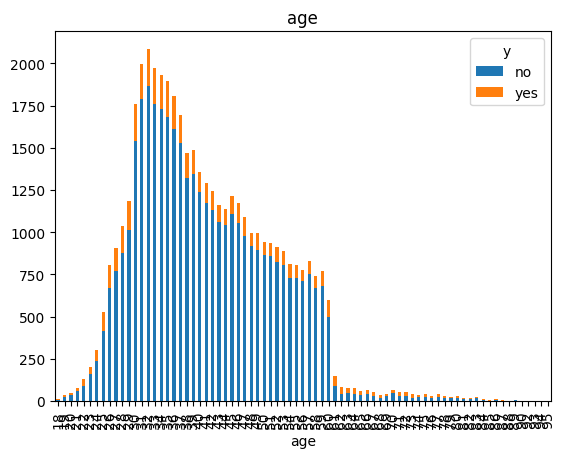

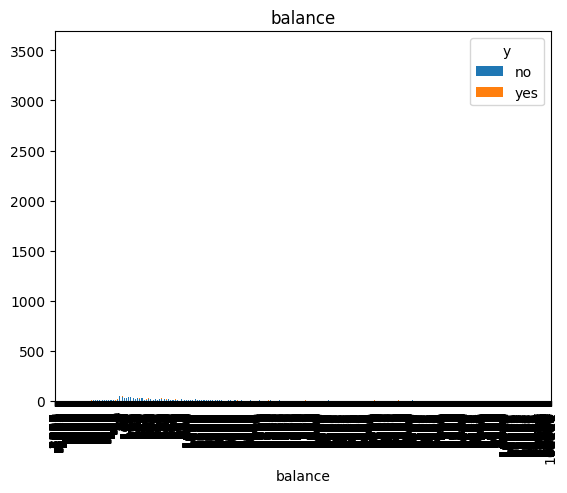

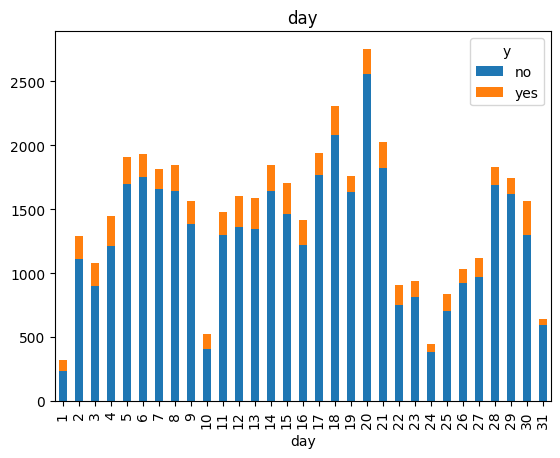

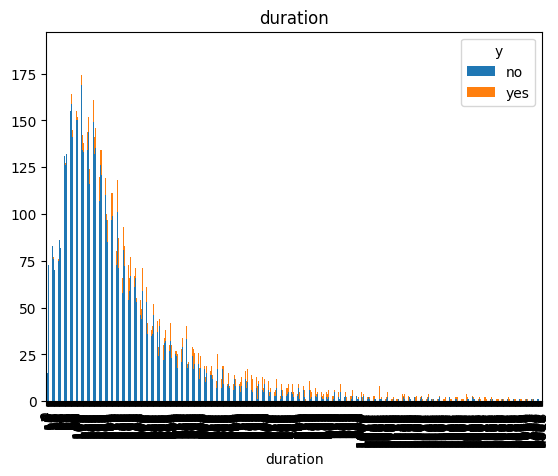

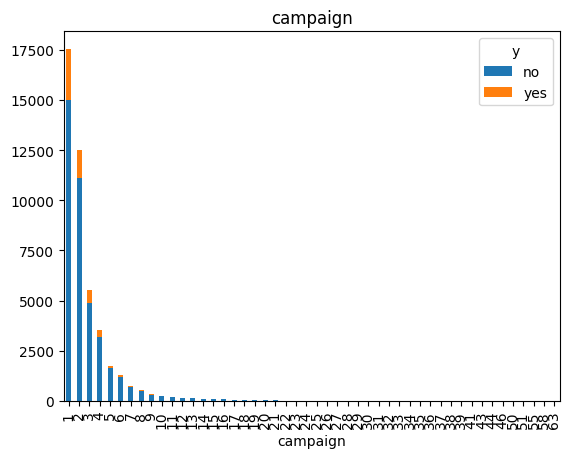

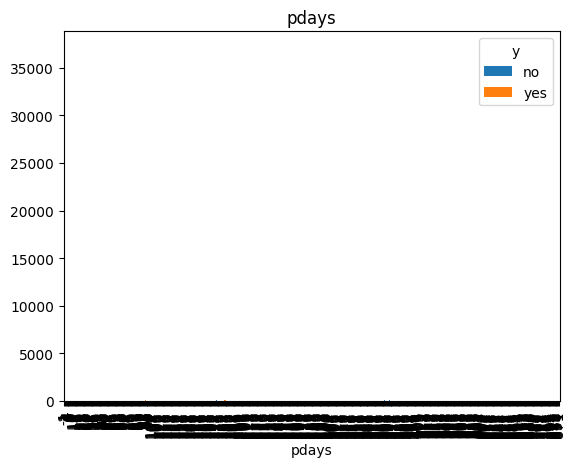

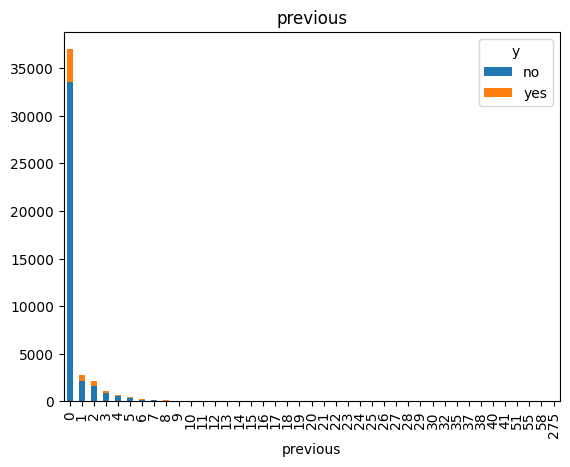

In [9]:
# visualising non object data type columns in data

for i in data.columns:
    if data[i].dtypes!='object':
        %matplotlib inline
        pd.crosstab(data[i],data.y).plot(kind='bar',stacked=True)
        plt.title(i)
        plt.show()

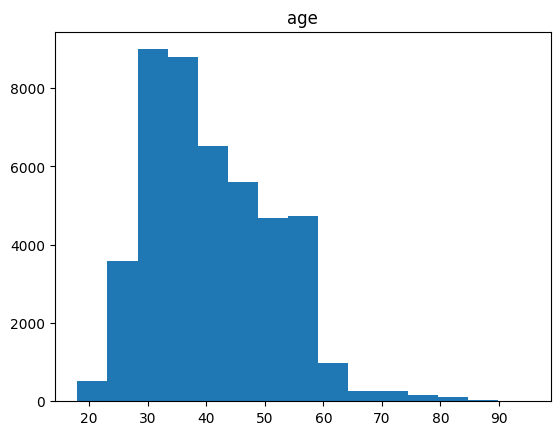

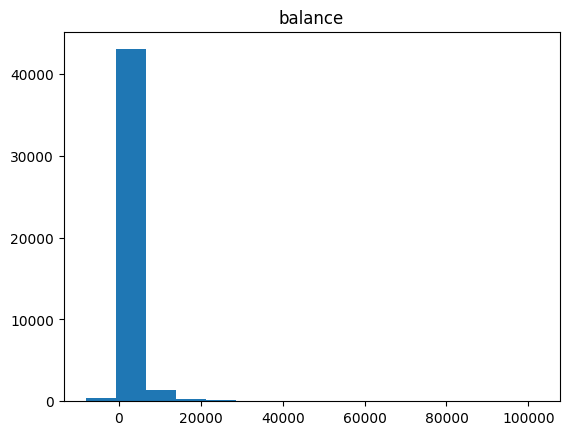

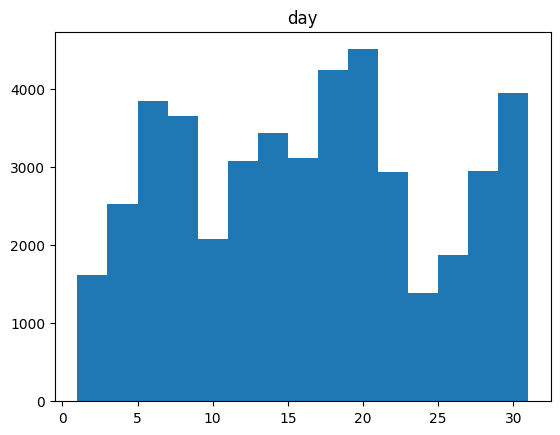

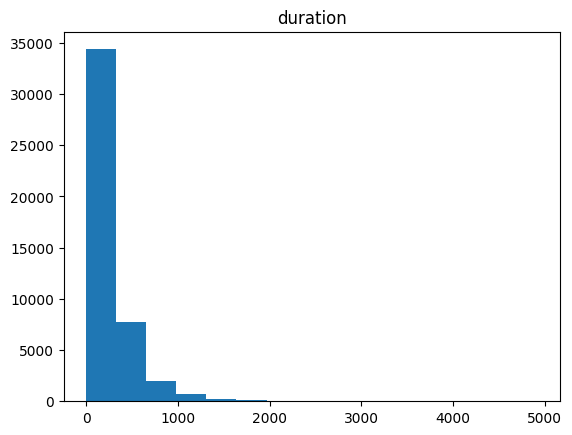

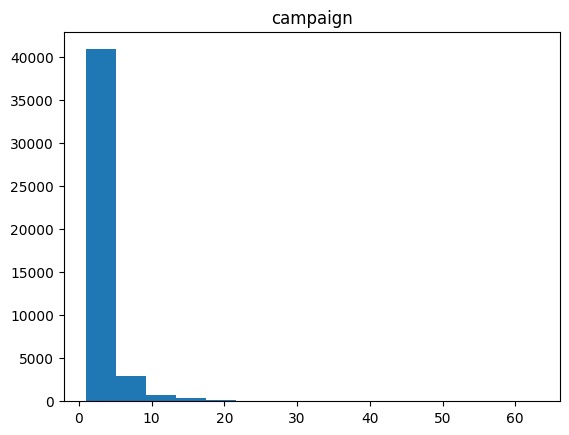

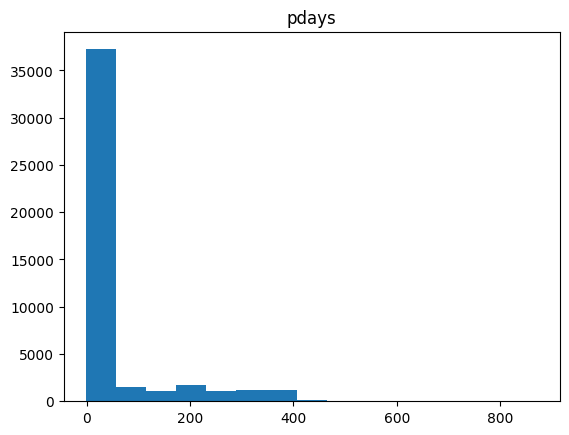

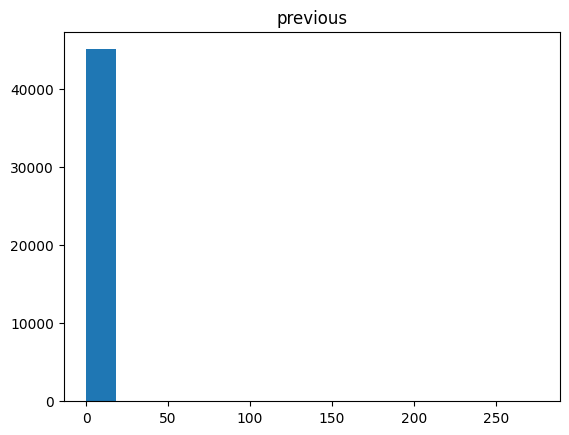

In [10]:

for i in data.columns:
    if data[i].dtypes!='object':
       
        plt.hist(data[i],bins=15)
        plt.title(i)
        plt.show()

here most of the client are from age group 30-40

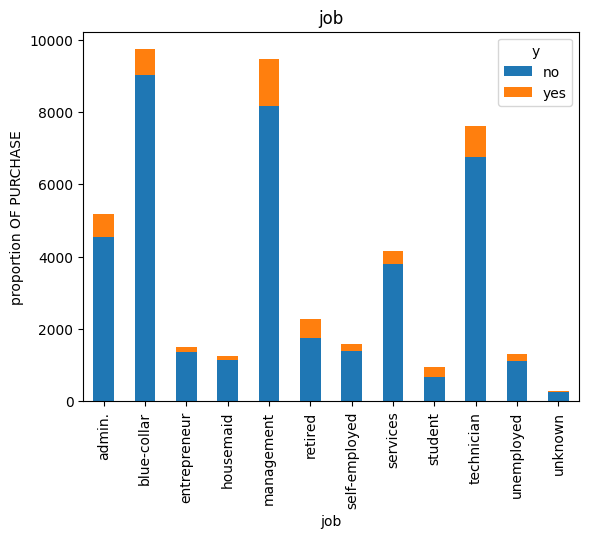

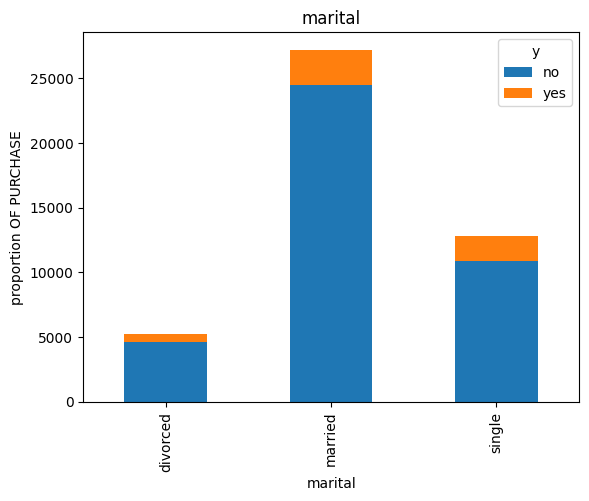

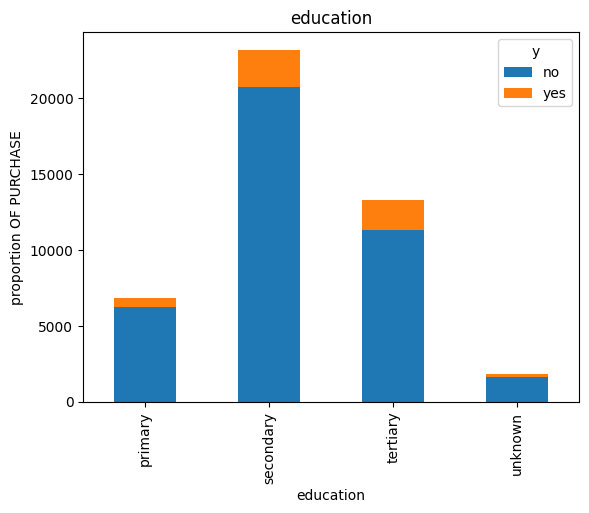

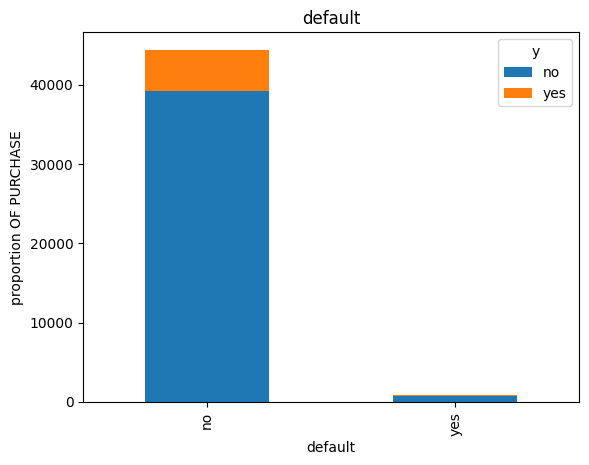

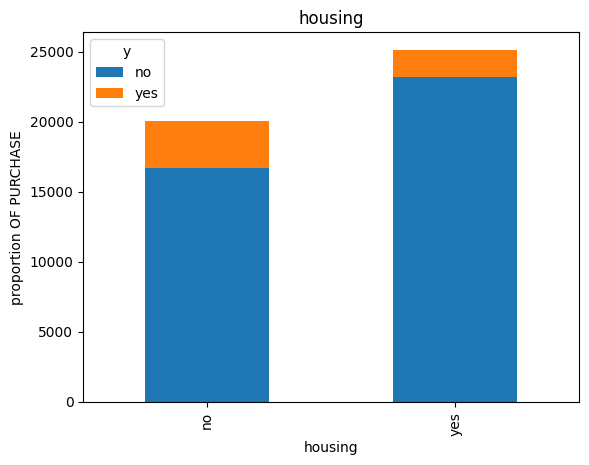

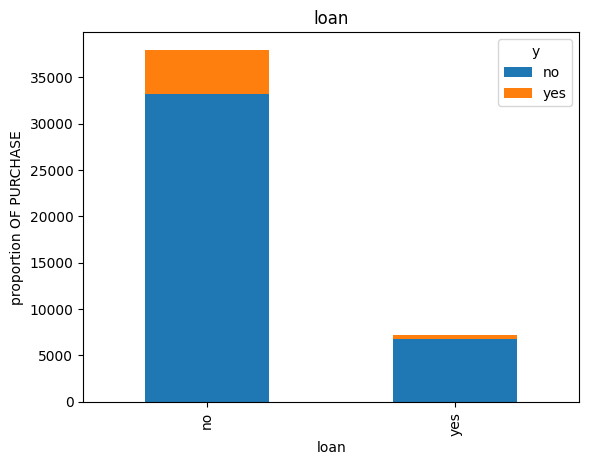

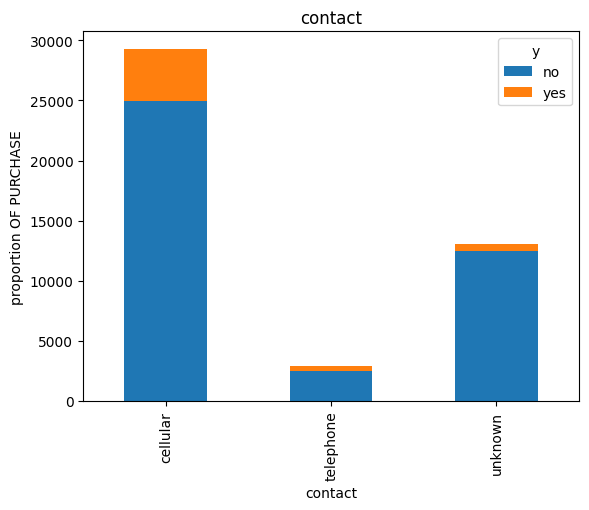

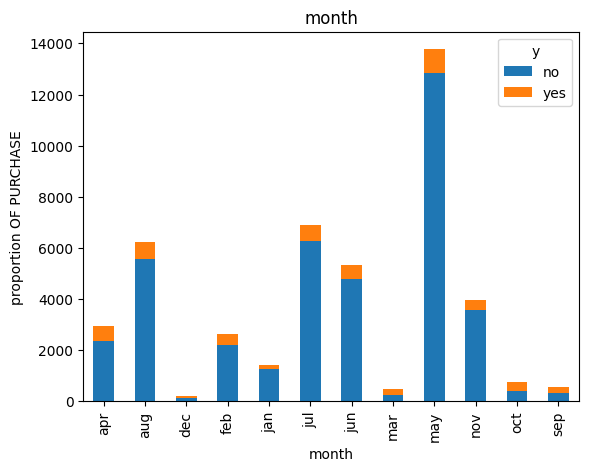

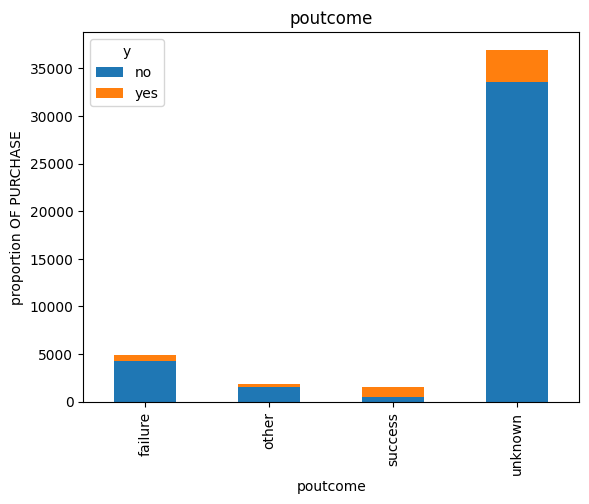

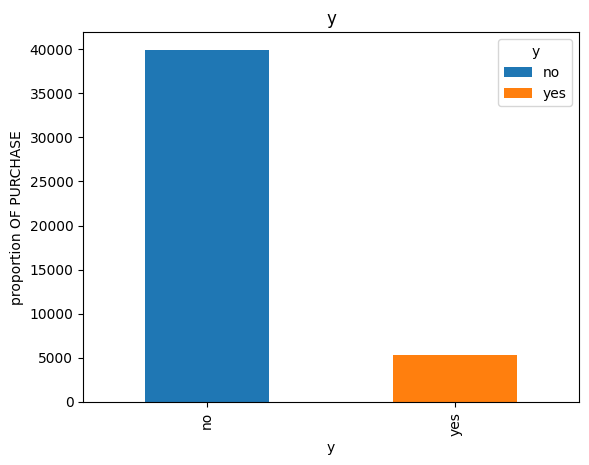

In [11]:
for i in data.columns:
   
    if data[i].dtypes=='object':
        %matplotlib inline
        pd.crosstab(data[i],data.y).plot(kind='bar',stacked=True)
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel('proportion OF PURCHASE')
        plt.show()
 # do not consider here default variable       

 1) The job tiltle is having great impact on the frequency of the purchase, so it can be the good predictor variable.
 
2) marital status is not a very strong  predictor variable.

3) education, housing, loan,poutcomes and contact is also showing impact on purchase frequency.

In [12]:
data=data.replace({'yes':1,'no':0})

In [13]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [14]:
data.drop(['day','month','pdays','campaign'],axis=1, inplace=True)

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,0,unknown,0


In [16]:
#For categorical data, get dummies.
data=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome'],drop_first=True, dtype='int')

In [17]:
data

,age,default,balance,housing,loan,duration,previous,y,job_blue-collar,job_entrepreneur,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,151,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,76,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,92,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,198,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,3,1,0,0,...,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,508,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1


In [18]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

job_dummy=pd.get_dummies(data['job'],drop_first=True ,dtype='int')
marital_dummy=pd.get_dummies(data['marital'],drop_first=True, dtype='int')
education_dummy=pd.get_dummies(data['education'],drop_first=True, dtype='int')
contact_dummy=pd.get_dummies(data['contact'],drop_first=True, dtype='int')
poutcome_dummy=pd.get_dummies(data['poutcome'],drop_first=True, dtype='int')
#concatenate the dummy variables
data=pd.concat([data,job_dummy,marital_dummy,education_dummy,contact_dummy,poutcome_dummy],axis=1)
data.head()

In [19]:
#splitting data into features(x) and target variable(y)
x=data.drop('y',axis=1)
y=data['y']


In [20]:
print(x)
y

       age  default  balance  housing  loan  duration  previous  \
0       58        0     2143        1     0       261         0   
1       44        0       29        1     0       151         0   
2       33        0        2        1     1        76         0   
3       47        0     1506        1     0        92         0   
4       33        0        1        0     0       198         0   
...    ...      ...      ...      ...   ...       ...       ...   
45206   51        0      825        0     0       977         0   
45207   71        0     1729        0     0       456         0   
45208   72        0     5715        0     0      1127         3   
45209   57        0      668        0     0       508         0   
45210   37        0     2971        0     0       361        11   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  marital_married  \
0                    0                 0              0  ...                1   
1                    0           

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\alkap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print(model.coef_)
print(model.intercept_ )
Beta_Coefficients=pd.Series(model.coef_[0])
Beta_Coefficients

[[-1.18886456e-02 -5.04300318e-02  1.81440448e-05 -1.12728072e+00
  -4.59208948e-01  4.07972900e-03 -1.25205417e-02 -4.70835284e-01
  -9.13321995e-02 -7.18269311e-02 -1.99015575e-01  3.85214890e-01
  -9.01890410e-02 -1.59577052e-01  8.69357412e-02 -1.27680710e-01
  -7.70444620e-03 -4.10557996e-04 -5.11375713e-01 -1.72711045e-01
  -2.09279731e-01 -2.01987313e-01 -1.84259830e-03  3.58850830e-02
  -9.33392695e-01 -9.05112260e-02  9.39836977e-01 -1.16917194e+00]]
[-0.70980541]


0    -0.011889
1    -0.050430
2     0.000018
3    -1.127281
4    -0.459209
5     0.004080
6    -0.012521
7    -0.470835
8    -0.091332
9    -0.071827
10   -0.199016
11    0.385215
12   -0.090189
13   -0.159577
14    0.086936
15   -0.127681
16   -0.007704
17   -0.000411
18   -0.511376
19   -0.172711
20   -0.209280
21   -0.201987
22   -0.001843
23    0.035885
24   -0.933393
25   -0.090511
26    0.939837
27   -1.169172
dtype: float64

In [42]:
#predicting probability
y_pred_prob=model.predict_proba(x)
y_pred_prob

array([[0.98831712, 0.01168288],
       [0.98733113, 0.01266887],
       [0.99499887, 0.00500113],
       ...,
       [0.024066  , 0.975934  ],
       [0.83584241, 0.16415759],
       [0.65998379, 0.34001621]])

In [43]:
y_pred_prob=pd.DataFrame(y_pred_prob)
#pred_prob['y_pred'] = model.predict(X)[0:20]
y_pred_prob
y_pred=model.predict(x)
y_pred
y_pred_prob['y_pred_manual']=y_pred_prob[1].apply(lambda x: 0 if x<0.5 else 1)
y_pred_prob
y_pred_prob['Predictions_Model'] = model.predict(x)
y_pred_prob

,0,1,y_pred_manual,Predictions_Model
0,0.988317,0.011683,0,0
1,0.987331,0.012669,0,0
2,0.994999,0.005001,0,0
3,0.993817,0.006183,0,0
4,0.929028,0.070972,0,0
...,...,...,...,...
45206,0.337485,0.662515,1,1
45207,0.609718,0.390282,0,0
45208,0.024066,0.975934,1,1
45209,0.835842,0.164158,0,0


In [44]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predictions':model.predict(x)})

In [49]:
y_pred_df[550:600]

,actual,predictions
550,0,0
551,0,0
552,0,0
553,0,0
554,0,0
555,0,0
556,0,0
557,0,0
558,0,0
559,0,0


In [50]:
#predicting probability for test data
y_pred_prob=model.predict_proba(x_test)
y_pred_prob
y_pred_prob=pd.DataFrame(y_pred_prob)
#pred_prob['y_pred'] = model.predict(X)[0:20]
y_pred_prob
y_pred=model.predict(x_test)
y_pred
y_pred_prob['y_pred_manual']=y_pred_prob[1].apply(lambda x: 0 if x<0.5 else 1)
y_pred_prob
y_pred_prob['Predictions_Model'] = model.predict(x_test)
y_pred_prob
y_pred_df= pd.DataFrame({'actual': y_test,
                         'predictions':model.predict(x_test)})
y_pred_df

,actual,predictions
10728,0,0
36421,0,0
14602,0,0
15124,0,0
19159,0,0
...,...,...
42635,1,0
17387,0,0
42062,1,0
17386,0,0


In [51]:
#Model Evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy,confusion_matrix)

0.8961627778392126 [[7801  182]
 [ 757  303]]


In [52]:
# accuracy is approximately 90%,so it is a good model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7983
           1       0.62      0.29      0.39      1060

    accuracy                           0.90      9043
   macro avg       0.77      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [53]:
y_test

10728    0
36421    0
14602    0
15124    0
19159    0
        ..
42635    1
17387    0
42062    1
17386    0
20291    1
Name: y, Length: 9043, dtype: int64

In [54]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_test= label_encoder.fit_transform(y_test)
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

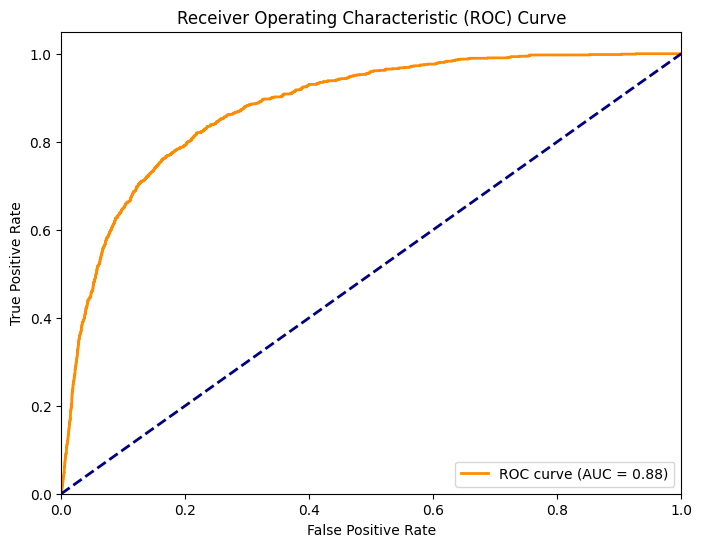

In [55]:
#ROC Curve
y_scores = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc

0.8793893391381212

conclusion: we fit a logistic model for the bank data which gives a model with 90% accuracy. Since it is a logistic regression model we use roc curve for more evaluation. the area under roc curve is almost 0.88, which means almost 88% true positive classifications are right.